In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from c_an_utilis import *
import sys
sys.path.append('../')
from helpers import *

data_path = './../../../data'

In [2]:
rb_dir = os.path.join(data_path, 'RateBeer')
rev_with_scores_rb = pd.read_pickle(os.path.join(rb_dir, 'rev_w_scores.pkl'))
rev_with_scores_rb['date'] = pd.to_datetime(rev_with_scores_rb['date'])
beers_rb = pd.read_csv(os.path.join(rb_dir, 'beers_RB_clean.csv'))
users_rb = pd.read_csv(os.path.join(rb_dir, 'users_RB_clean.csv'))
exp_categories = get_exp_categories(data_path) + ['expertness_score']


In [3]:
users_rb['location'] = users_rb['location'].str.replace(r'United States, .*', 'United States', regex=True)

In [4]:
complete_beer = pd.merge(beers_rb, rev_with_scores_rb, on='beer_id')

In [5]:
col_to_keep = ['style_x'] + exp_categories
beer_gr = complete_beer[col_to_keep].groupby('style_x')

In [6]:
style_size = beer_gr.size()
style_size.sort_values()

style_x
Saké - Namasaké              4
Saké - Tokubetsu             8
Saké - Koshu                12
Saké - Honjozo              17
Saké - Infused              36
                         ...  
Imperial IPA            259915
American Pale Ale       269099
Pale Lager              293556
Imperial Stout          331742
India Pale Ale (IPA)    522078
Length: 93, dtype: int64

## Analysis on IPA

In [7]:
Ipa_name = 'India Pale Ale (IPA)'
rev_IPA, complete_IPA = get_style_dfs(Ipa_name, complete_beer, users_rb, exp_categories)

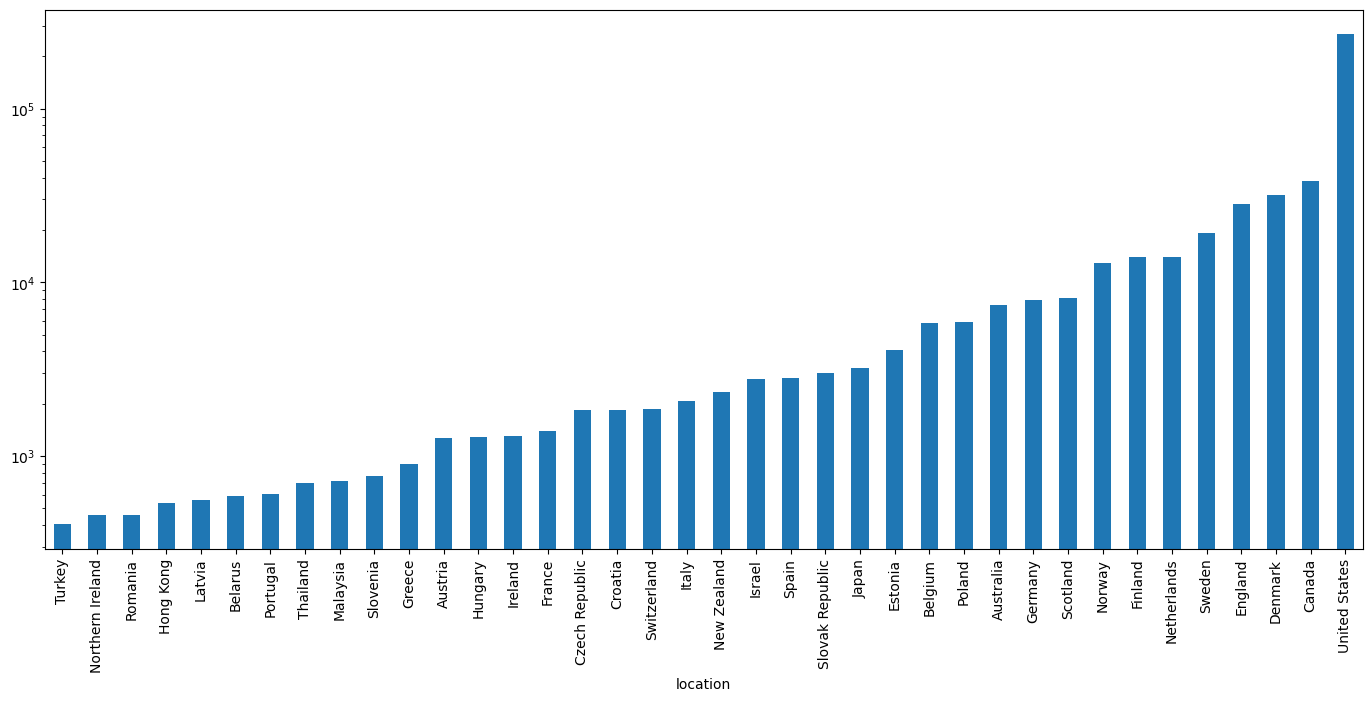

In [8]:
plot_country_distrbution(complete_IPA, threshold=400)

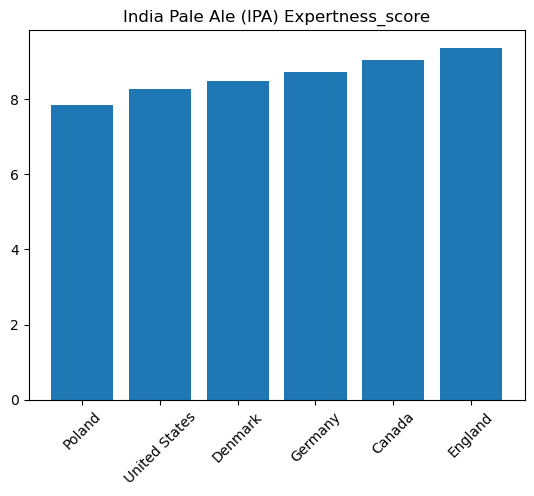

In [9]:
sel_countries = ['Canada', 'Denmark', 'England', 'United States', 'Germany', 'Poland']
plot_country_exp_score(complete_IPA, sel_countries, style=Ipa_name)

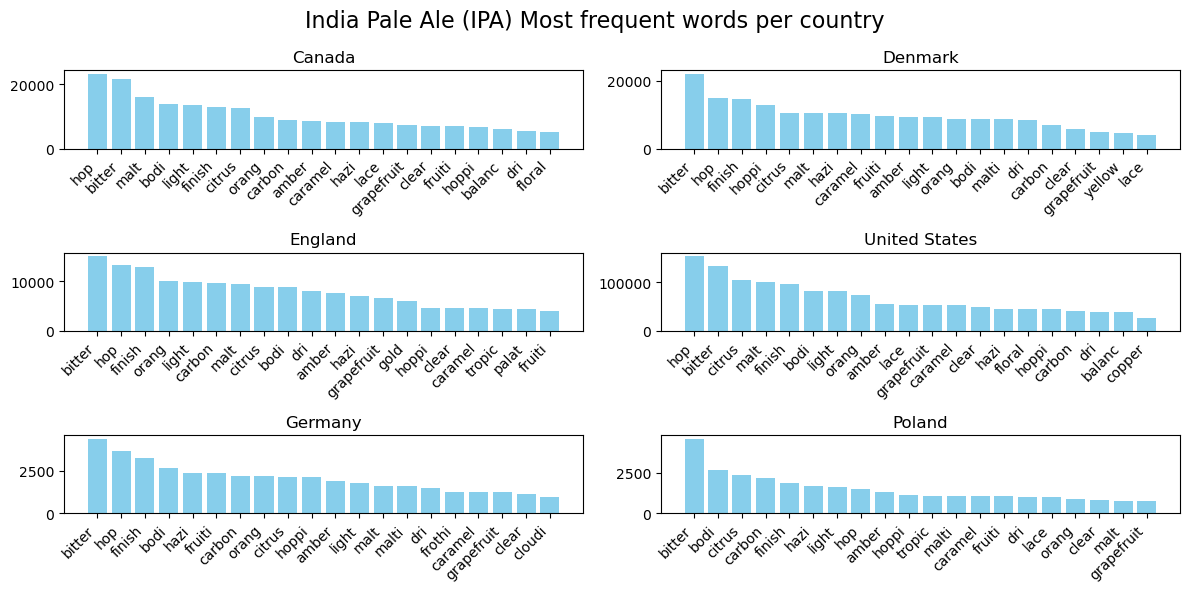

In [10]:
count_words_IPA = get_count_words(complete_IPA, sel_countries)
plot_count_words(count_words_IPA, style=Ipa_name)

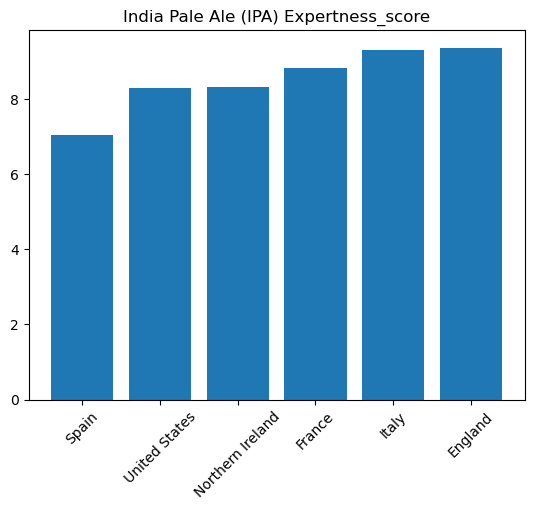

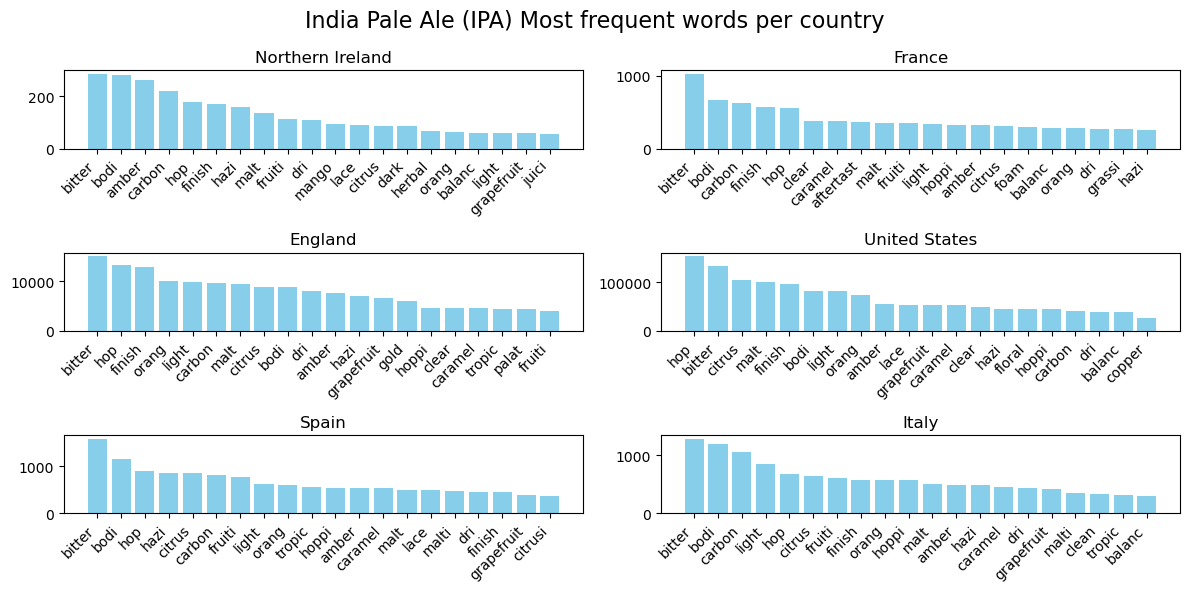

In [11]:
sel_2 = ['Northern Ireland', 'France', 'England', 'United States', 'Spain', 'Italy']
count_words_IPA = get_count_words(complete_IPA, sel_2)
plot_country_exp_score(complete_IPA, sel_2, style=Ipa_name)
plot_count_words(count_words_IPA, style=Ipa_name)

## Analysis on Imperial Stout

In [12]:
IS_name='Imperial Stout'
rev_IS, complete_IS = get_style_dfs(IS_name, complete_beer, users_rb, exp_categories)

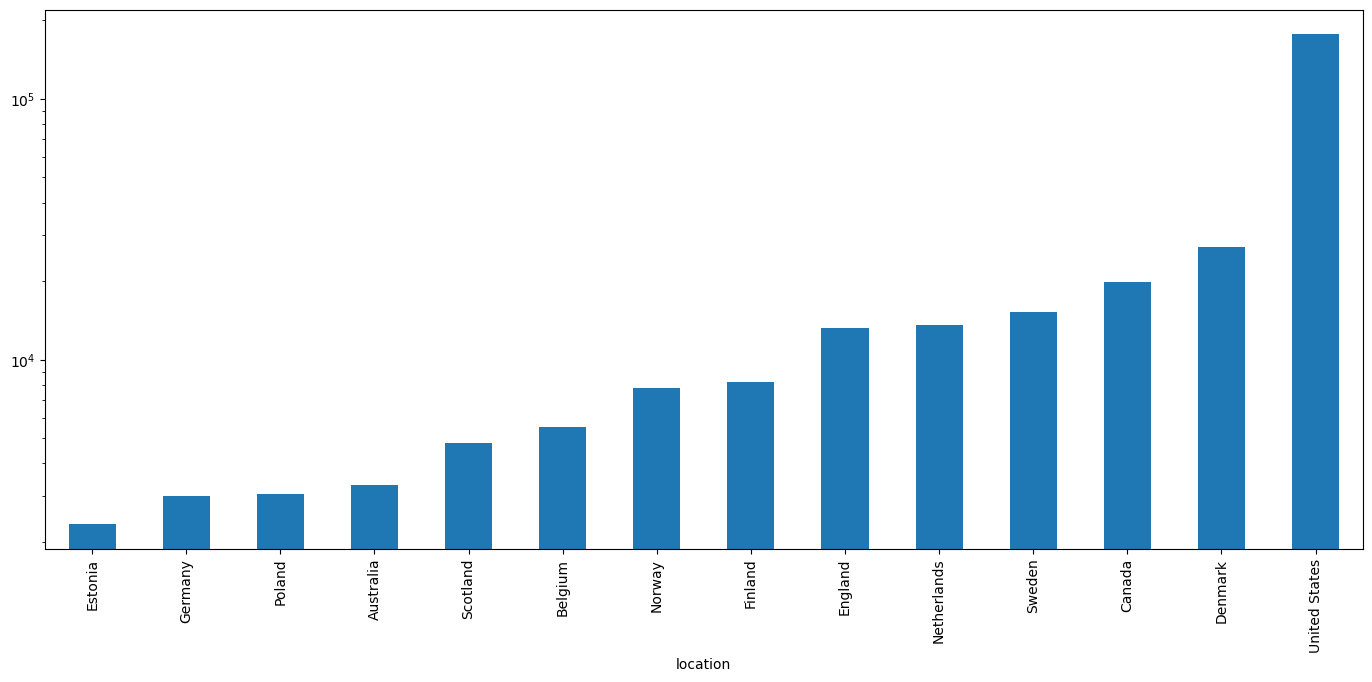

In [13]:
plot_country_distrbution(complete_IS, threshold=2000)

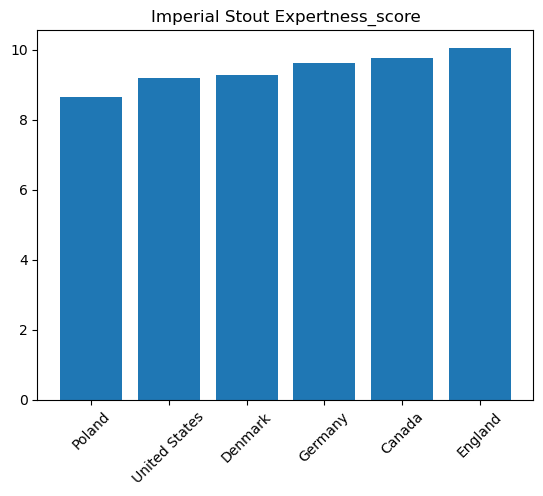

In [14]:
plot_country_exp_score(complete_IS, sel_countries, style=IS_name)

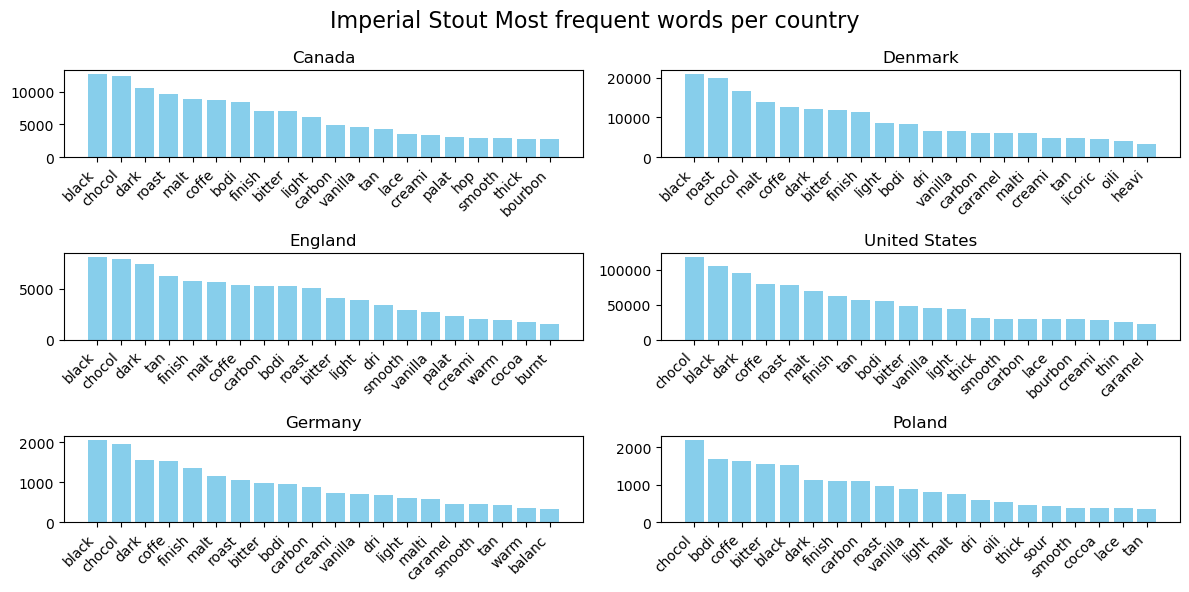

In [15]:
count_words_IS =get_count_words(complete_IS, sel_countries)
plot_count_words(count_words_IS, style=IS_name)

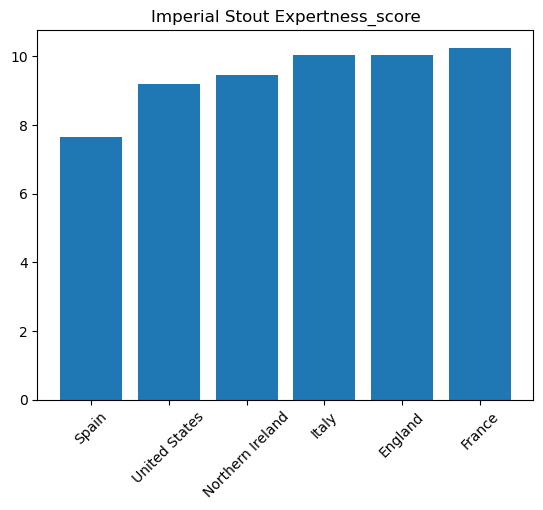

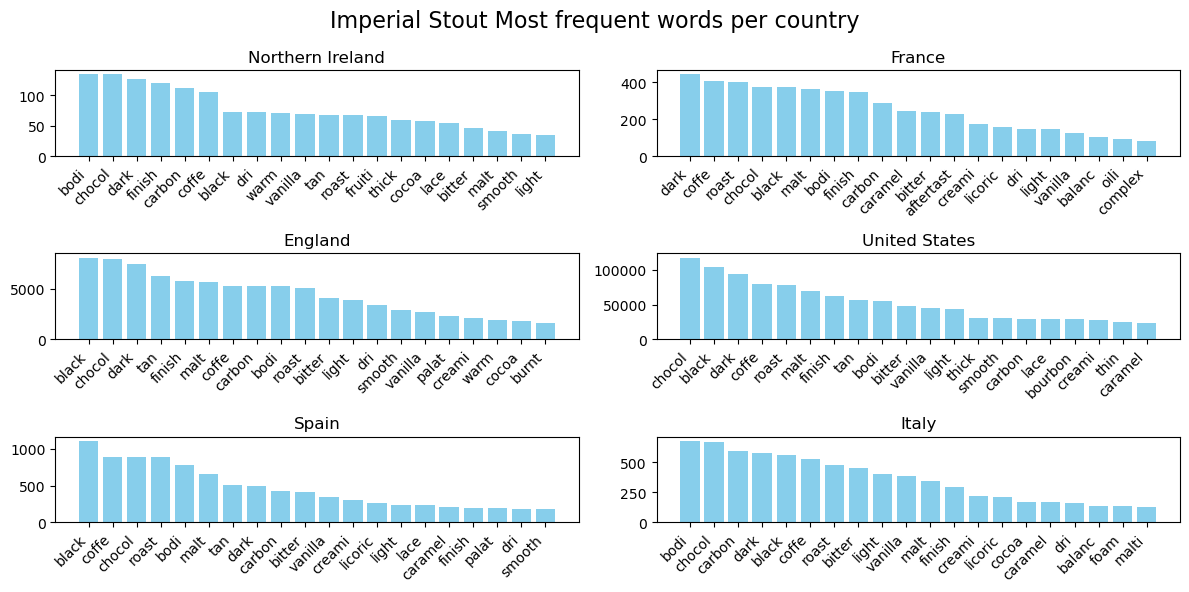

In [16]:
count_words_IS = get_count_words(complete_IS, sel_2)
plot_country_exp_score(complete_IS, sel_2, style=IS_name)
plot_count_words(count_words_IS, style=IS_name)

## Analysis on Pale Lager

In [17]:
PL_name = 'Pale Lager'
rev_PL, complete_PL = get_style_dfs(PL_name, complete_beer, users_rb, exp_categories)

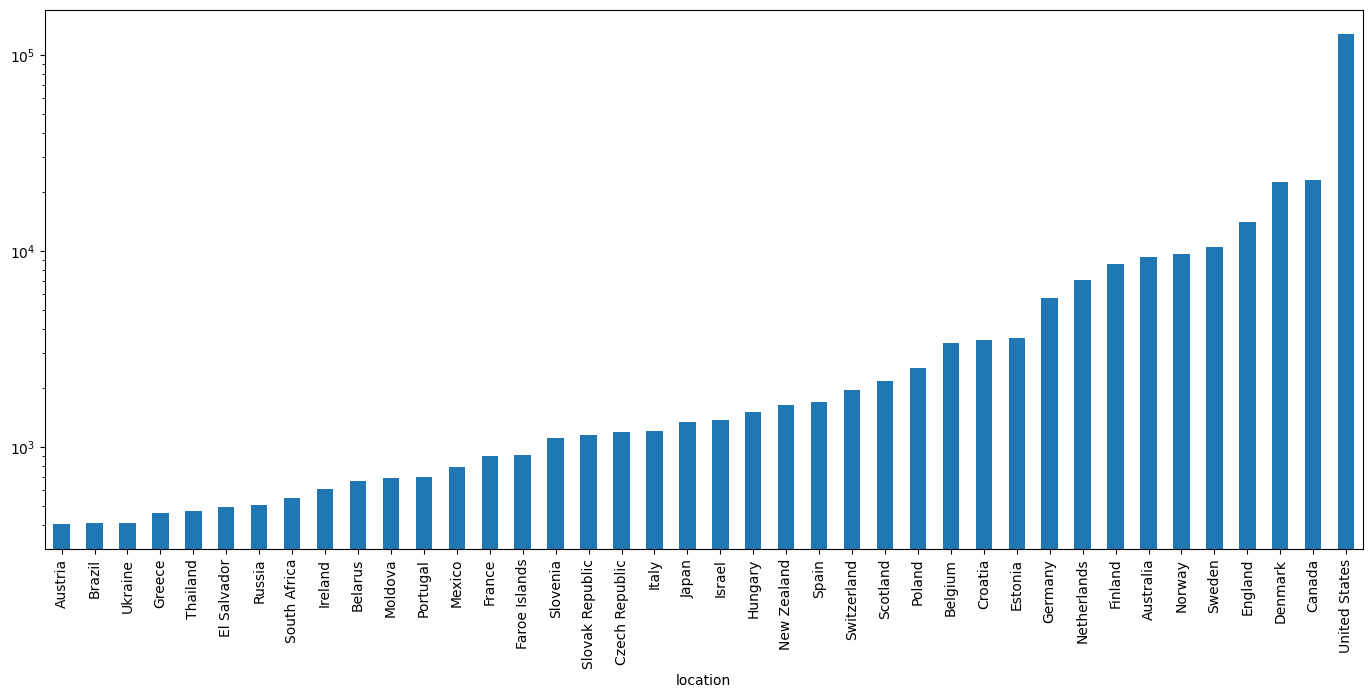

In [18]:
plot_country_distrbution(complete_PL, threshold=400)

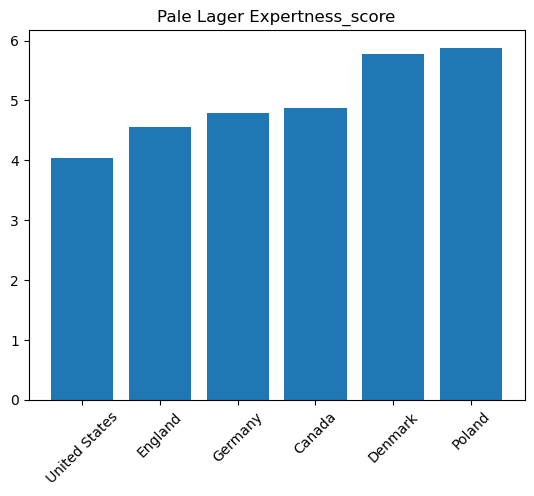

In [19]:
sel_countries = ['Canada', 'Denmark', 'England', 'United States', 'Germany', 'Poland']
plot_country_exp_score(complete_PL, sel_countries, style=PL_name)

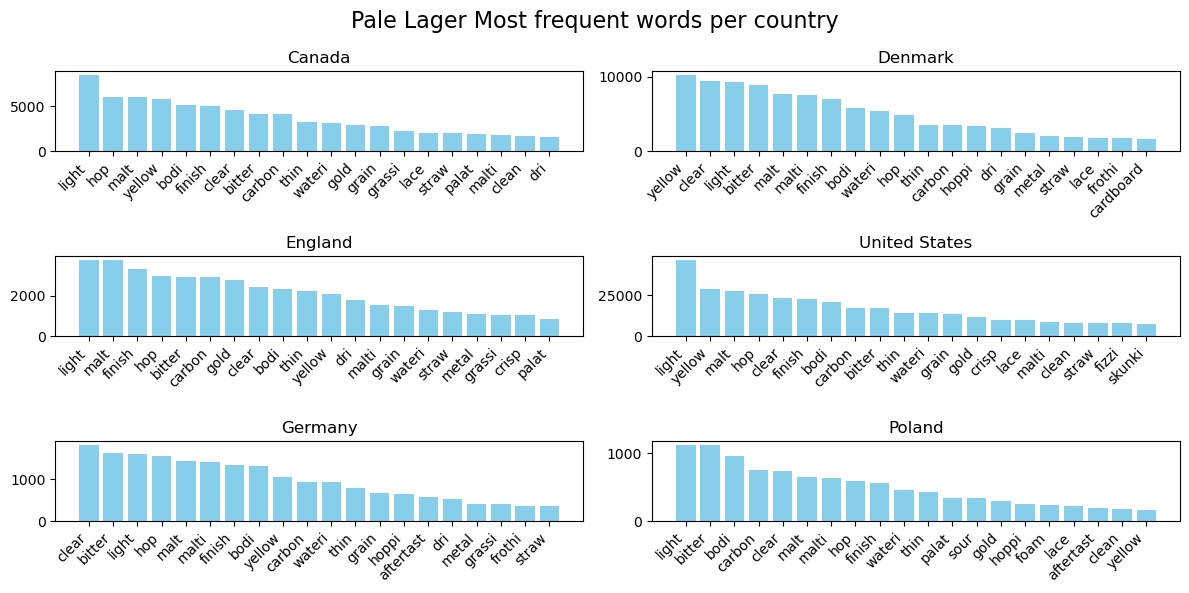

In [20]:
count_words = get_count_words(complete_PL, sel_countries)
plot_count_words(count_words, style=PL_name)

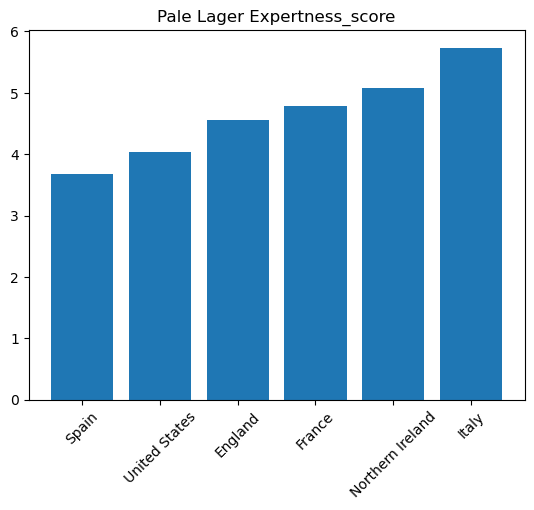

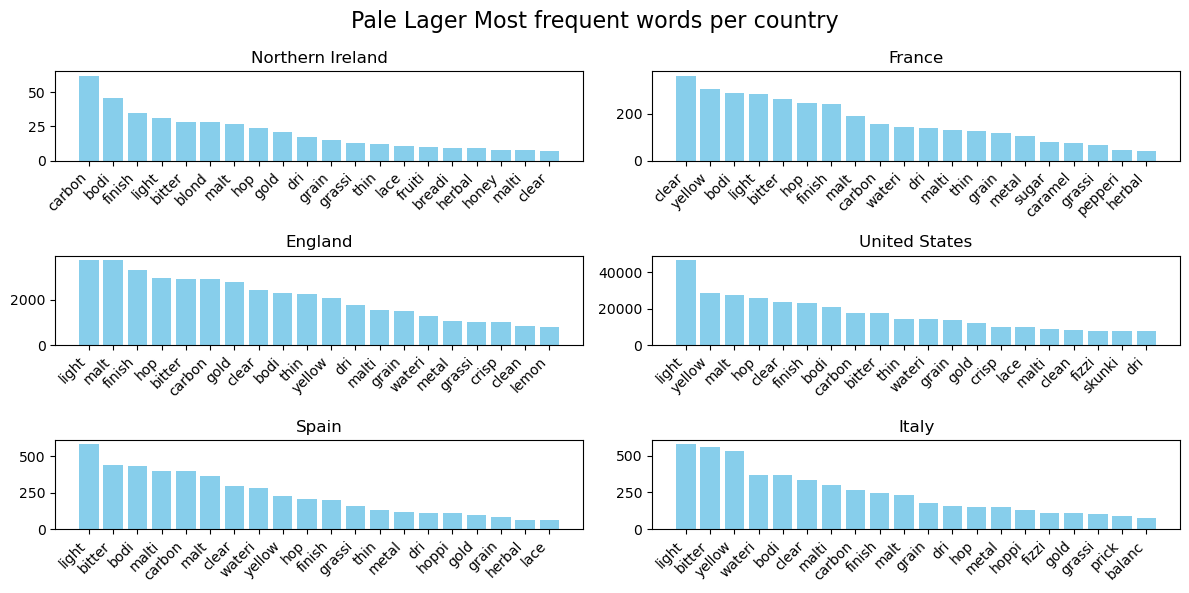

In [21]:
plot_country_exp_score(complete_PL, sel_2, style=PL_name)
count_words = get_count_words(complete_PL, sel_2)
plot_count_words(count_words, style=PL_name)